In [1]:
import os, io
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from matplotlib.dates import DateFormatter
import seaborn as sns
from PIL import Image

In [2]:
# CSV reader function

def csvReader(url):
    df = pd.read_csv(url, 
                    delimiter = ',', header = 0, parse_dates=True, na_filter=True, encoding="utf-8")

    df['date'] = pd.to_datetime(df['date'])

    # filter date range
    start_date = df['date'] >= "2008-01-01"
    end_date = df['date'] < "2011-01-01"

    df = df[ start_date & end_date ]

    
    # checks for the value in the file column and multiply by 10e-6
    if 'value' in df:
        df = df[df['value'] != -32000] # filter outliers = -32000
        df['mcr'] = df['value'] * (10**-6)

    df = df.set_index('date')

    return df

In [3]:
# BAFOULABE
bafoulabe_1 = csvReader('data/series_13.81386_-10.82952_2007-01-01_2010-12-31_Bafoulabe.csv')
bafoulabe_10 = csvReader('data/JRC_2002_2020_-10.793_13.84_Bafoulabe.csv')

# KAYES
kayes_1 = csvReader('data/series_14.44858_-11.42722_2008-01-01_2010-12-31_Kayes.csv')
kayes_10 = csvReader('data/JRC_2002_2020_-11.455_14.524_Kayes.csv')

# BAKEL
bakel_1 = csvReader('data/series_14.89412_-12.45496_2007-01-01_2010-12-31_Bakel.csv')
bakel_10 = csvReader('data/JRC_2002_2020_-12.46_14.89_Bakel.csv')

In [4]:
print(bafoulabe_10.head(5))

             value       mcr
date                        
2008-01-01  989226  0.989226
2008-01-02  990394  0.990394
2008-01-03  990562  0.990562
2008-01-04  987285  0.987285
2008-01-05  987285  0.987285


In [5]:
bafoulabe_10.dtypes

value      int64
mcr      float64
dtype: object

In [6]:
print(f"minimum: {min(bafoulabe_10['mcr'])}, maximum: {max(bafoulabe_10['mcr'])}") 

minimum: 0.947326, maximum: 1.002402


In [7]:
bafoulabe_10.index

DatetimeIndex(['2008-01-01', '2008-01-02', '2008-01-03', '2008-01-04',
               '2008-01-05', '2008-01-06', '2008-01-07', '2008-01-08',
               '2008-01-09', '2008-01-10',
               ...
               '2010-12-22', '2010-12-23', '2010-12-24', '2010-12-25',
               '2010-12-26', '2010-12-27', '2010-12-28', '2010-12-29',
               '2010-12-30', '2010-12-31'],
              dtype='datetime64[ns]', name='date', length=1092, freq=None)

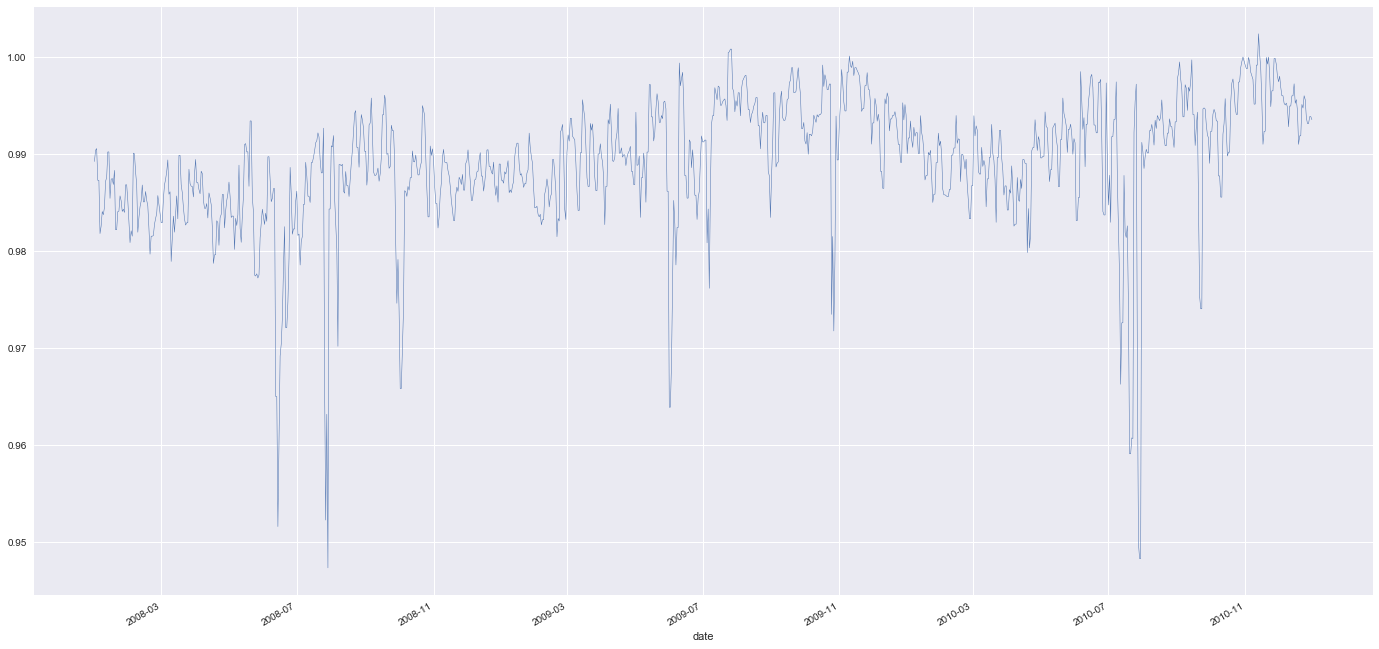

In [8]:
bafoulabe_10['mcr'].plot(linewidth=0.5, figsize=(24,12))

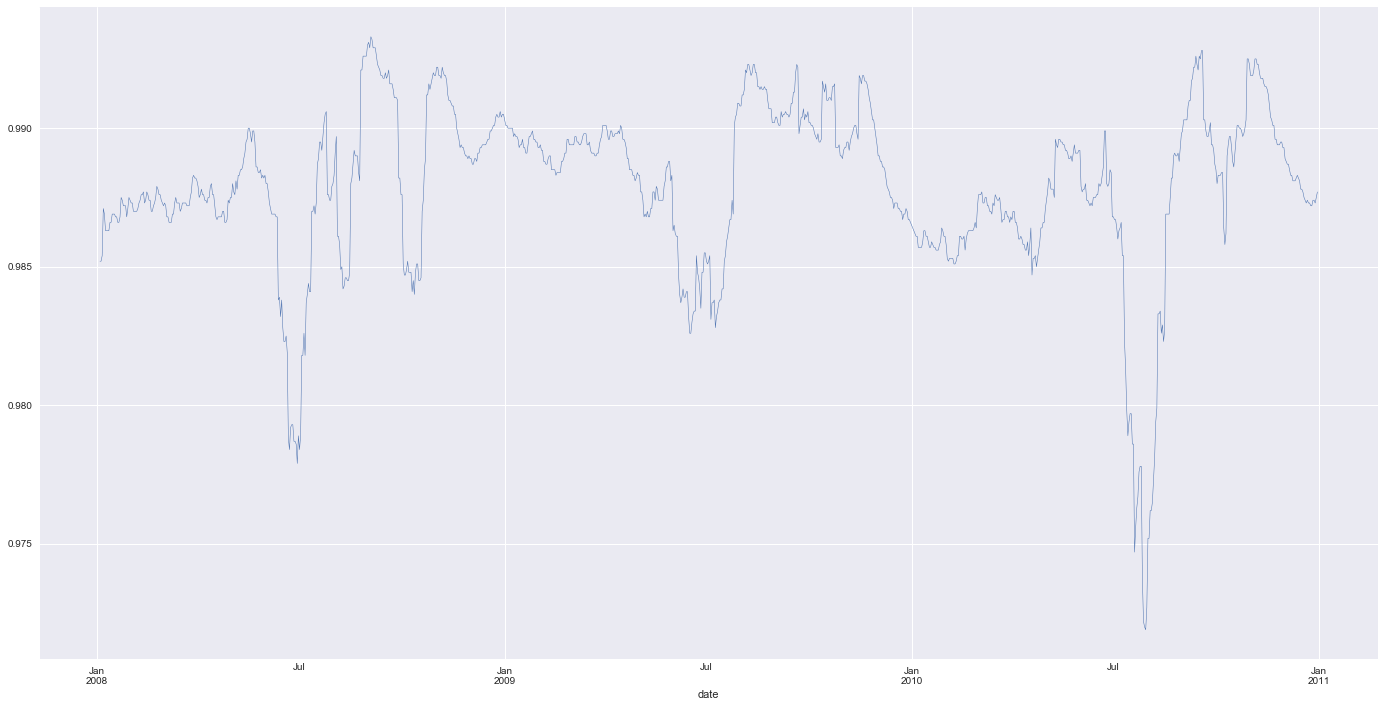

In [9]:
bafoulabe_1['WI-AMSRE-KA-H-DESC-K90_V003_1000_AVG'].plot(linewidth=0.5, figsize=(24,12))

In [10]:
#================== MCR =======================

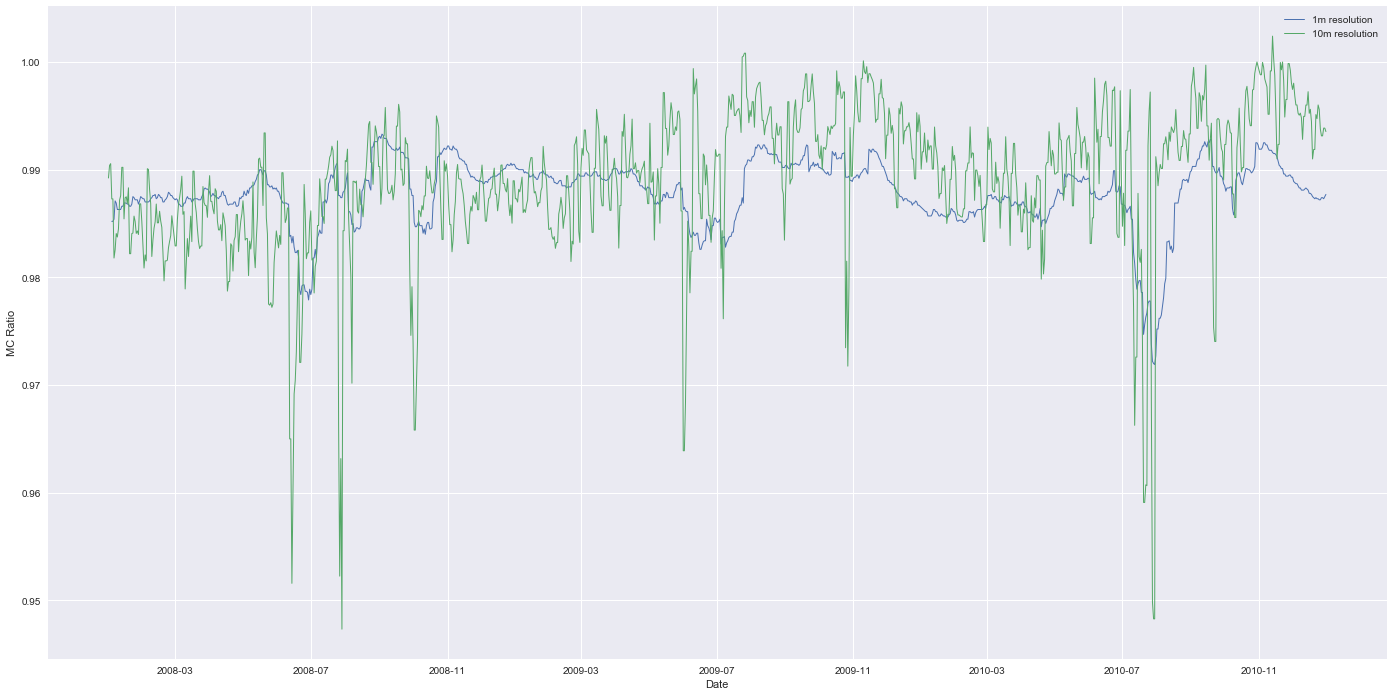

In [11]:
# BAFOULABE Plot 1x1 and 10x10 time series together
fig, ax = plt.subplots(figsize=(24, 12))
ax.plot(bafoulabe_1['WI-AMSRE-KA-H-DESC-K90_V003_1000_AVG'], linestyle='-', linewidth=1, label='1m resolution')
ax.plot(bafoulabe_10['mcr'], linestyle='-', linewidth=1, label='10m resolution')
ax.set_xlabel('Date')
ax.set_ylabel('MC Ratio')

ax.legend()

# Save the image in memory in PNG format
png_bafoulabe = io.BytesIO()
fig.savefig(png_bafoulabe, format="png")
# Load this image into PIL
png_save = Image.open(png_bafoulabe)

# Save as TIFF
png_save.save("output/MC_Ratio_bafoulabe.tiff")
png_bafoulabe.close()

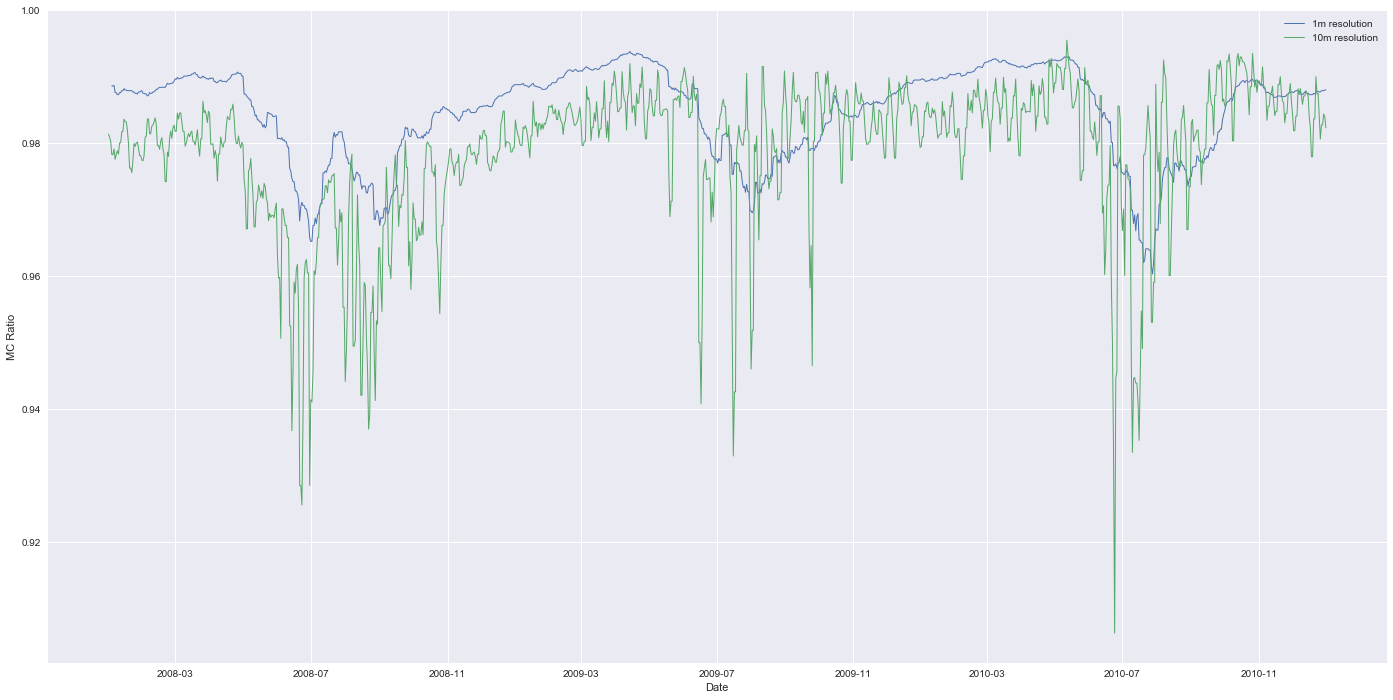

In [65]:
# KAYES Plot 1x1 and 10x10 time series together
fig, ax = plt.subplots(figsize=(24, 12))
ax.plot(kayes_1['WI-AMSRE-KA-H-DESC-K90_V003_1000_AVG'], linestyle='-', linewidth=1, label='1m resolution')
ax.plot(kayes_10['mcr'], linestyle='-', linewidth=1, label='10m resolution')
ax.set_xlabel('Date')
ax.set_ylabel('MC Ratio')
ax.legend()

# Save the image in memory in PNG format
png_kayes = io.BytesIO()
fig.savefig(png_kayes, format="png")
# Load this image into PIL
png_save = Image.open(png_kayes)

# Save as TIFF
png_save.save("output/MC_Ratio_kayes.tiff")
png_kayes.close()

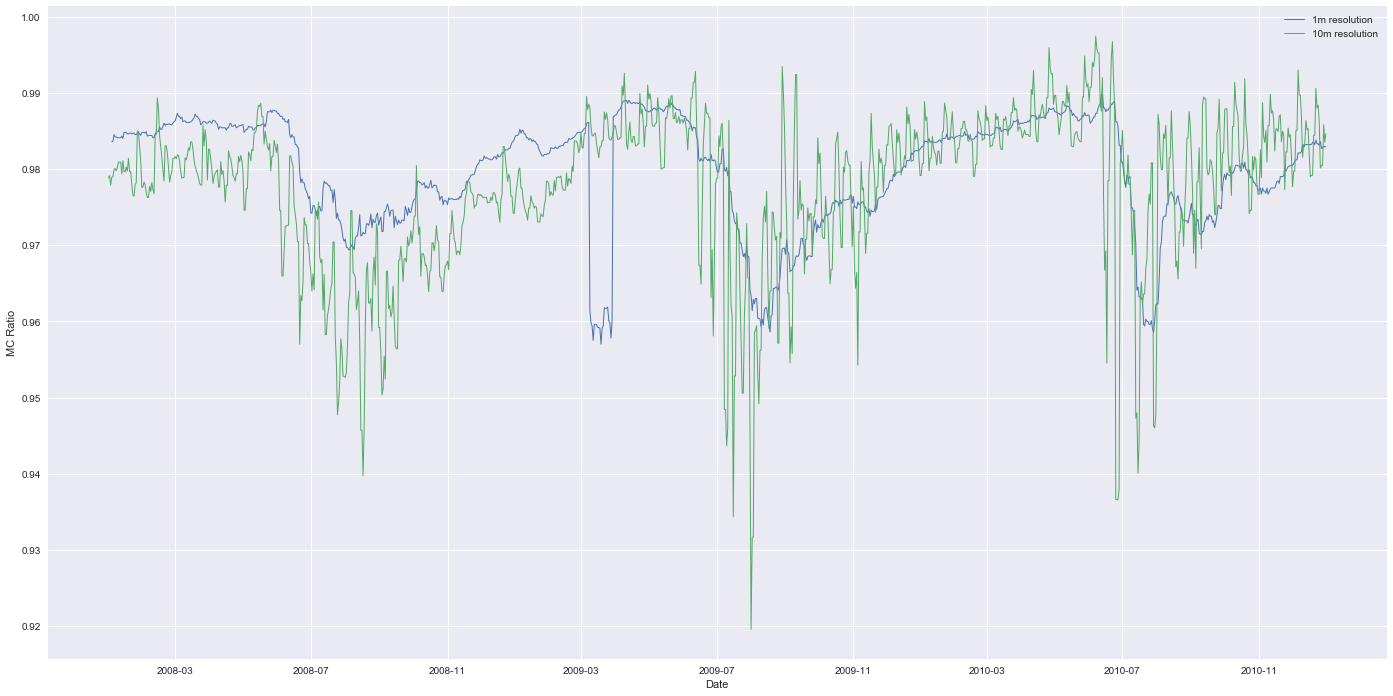

In [13]:
# BAKEL Plot 1x1 and 10x10 time series together
fig, ax = plt.subplots(figsize=(24, 12))
ax.plot(bakel_1['WI-AMSRE-KA-H-DESC-K90_V003_1000_AVG'], linestyle='-', linewidth=1, label='1m resolution')
ax.plot(bakel_10['mcr'], linestyle='-', linewidth=1, label='10m resolution')
ax.set_xlabel('Date')
ax.set_ylabel('MC Ratio')
ax.legend()

# Save the image in memory in PNG format
png_bakel = io.BytesIO()
fig.savefig(png_bakel, format="png")
# Load this image into PIL
png_save = Image.open(png_bakel)

# Save as TIFF
png_save.save("output/MC_Ratio_bakel.tiff")
png_bakel.close()

In [14]:
#==================== MODEL DISCHARGE

In [15]:
def dischargeCSVReader(url):
    df_discharge = pd.read_csv(url, 
                    delimiter = ',', header = 0, na_filter=True, encoding="utf-8")

    df_discharge['date'] = pd.to_datetime(df_discharge['date'])

    # df_discharge_2008_2010 = df_discharge[df_discharge['date'] < '2011-01-01']

    df_discharge_2008_2010 = df_discharge[(df_discharge['date'] >= '2009-01-01') & (df_discharge['date'] < '2011-01-01')]
    # df_discharge_2008_2010 = df_discharge.loc['2009-01-01':'2010-12-31']

    return df_discharge_2008_2010

In [16]:
kayes_discharge = dischargeCSVReader('data/Kayes - Blad1 (1).csv')

In [17]:
print(kayes_discharge.tail(5), kayes_discharge.index)

          date  Mean discharge (Observed)  Q sat discharge
725 2010-12-27                 311.899994       246.800003
726 2010-12-28                 283.200012       259.200012
727 2010-12-29                 278.700012       256.799988
728 2010-12-30                 295.700012       252.100006
729 2010-12-31                 298.600006       260.000000 Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            720, 721, 722, 723, 724, 725, 726, 727, 728, 729],
           dtype='int64', length=730)


In [18]:
# kayes_discharge['Q sat discharge'].plot()
# kayes_discharge['Mean discharge (Observed)'].plot()

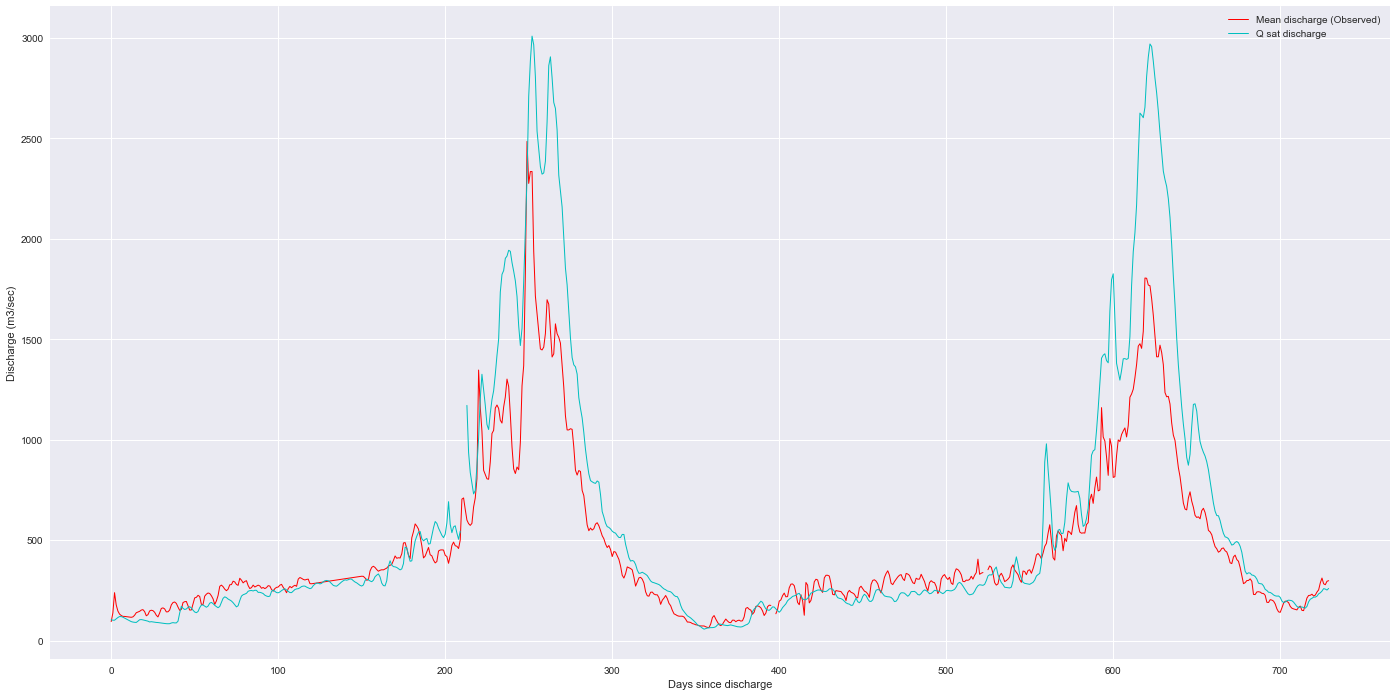

In [19]:
# KAYES Plot 1x1 and 10x10 time series together
fig, ax = plt.subplots(figsize=(24, 12))
ax.plot(kayes_discharge['Mean discharge (Observed)'], linestyle='-', color='r', linewidth=1, label='Mean discharge (Observed)')
ax.plot(kayes_discharge['Q sat discharge'], linestyle='-', linewidth=1, color='c', label='Q sat discharge')
ax.set_xlabel('Days since discharge')
ax.set_ylabel('Discharge (m3/sec)')
ax.legend()

# Save the image in memory in PNG format
png_kayes_discharge = io.BytesIO()
fig.savefig(png_kayes_discharge, format="png")
# Load this image into PIL
png_save = Image.open(png_kayes_discharge)

# Save as TIFF
png_save.save("output/Discharge_kayes.tiff")
png_kayes_discharge.close()

In [20]:
bakel_discharge = dischargeCSVReader('data/Bakel - Blad1 (1).csv')
print(bakel_discharge.head(5))

           date  Mean discharge
2922 2009-01-01      104.599998
2923 2009-02-01      101.800003
2924 2009-03-01      102.000000
2925 2009-04-01      108.699997
2926 2009-05-01      115.199997


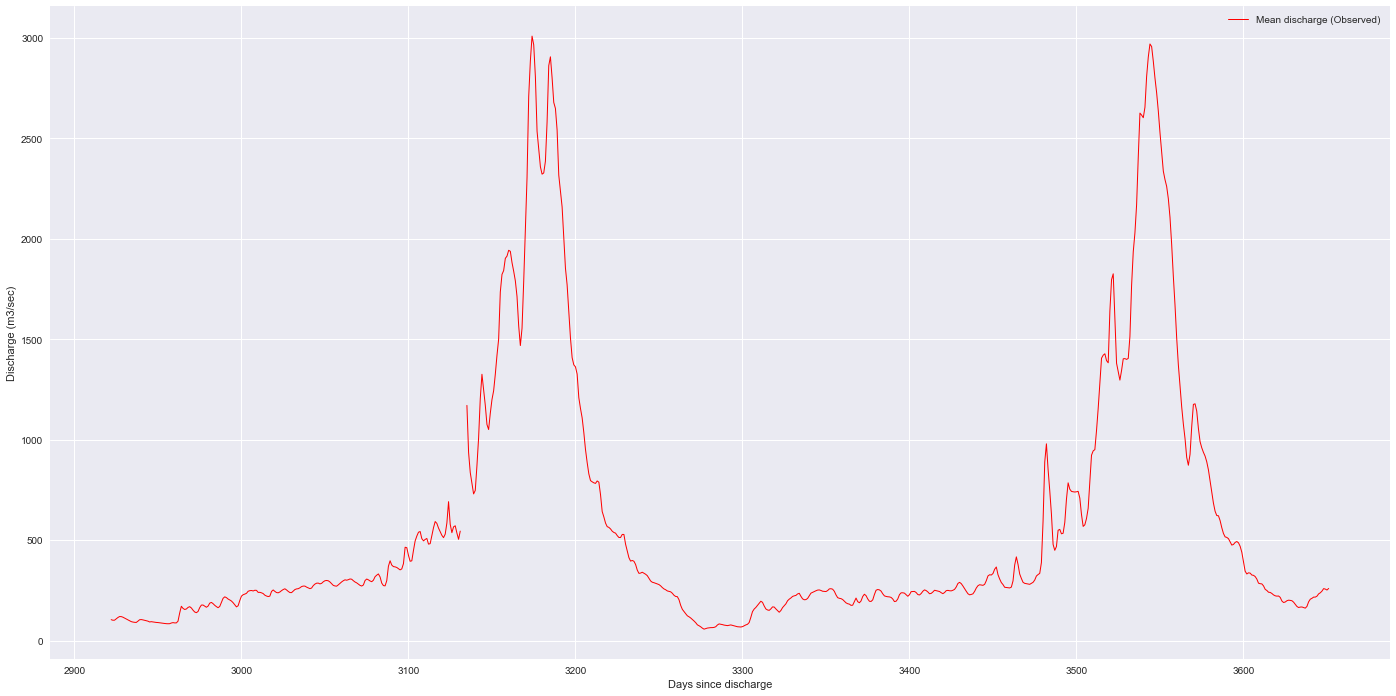

In [21]:
# BAKEL Plot 1x1 and 10x10 time series together
fig, ax = plt.subplots(figsize=(24, 12))
ax.plot(bakel_discharge['Mean discharge'], linestyle='-', linewidth=1, color='r', label='Mean discharge (Observed)')
# ax.plot(kayes_discharge['Q sat discharge'], linestyle='-', linewidth=1, label='Q sat discharge')
ax.set_xlabel('Days since discharge')
ax.set_ylabel('Discharge (m3/sec)')
ax.legend()

# Save the image in memory in PNG format
png_bakel_discharge = io.BytesIO()
fig.savefig(png_bakel_discharge, format="png")
# Load this image into PIL
png_save = Image.open(png_bakel_discharge)

# Save as TIFF
png_save.save("output/Discharge_bakel.tiff")
png_bakel_discharge.close()

In [22]:
#============ DISCHARGE KAYES & BAKEL

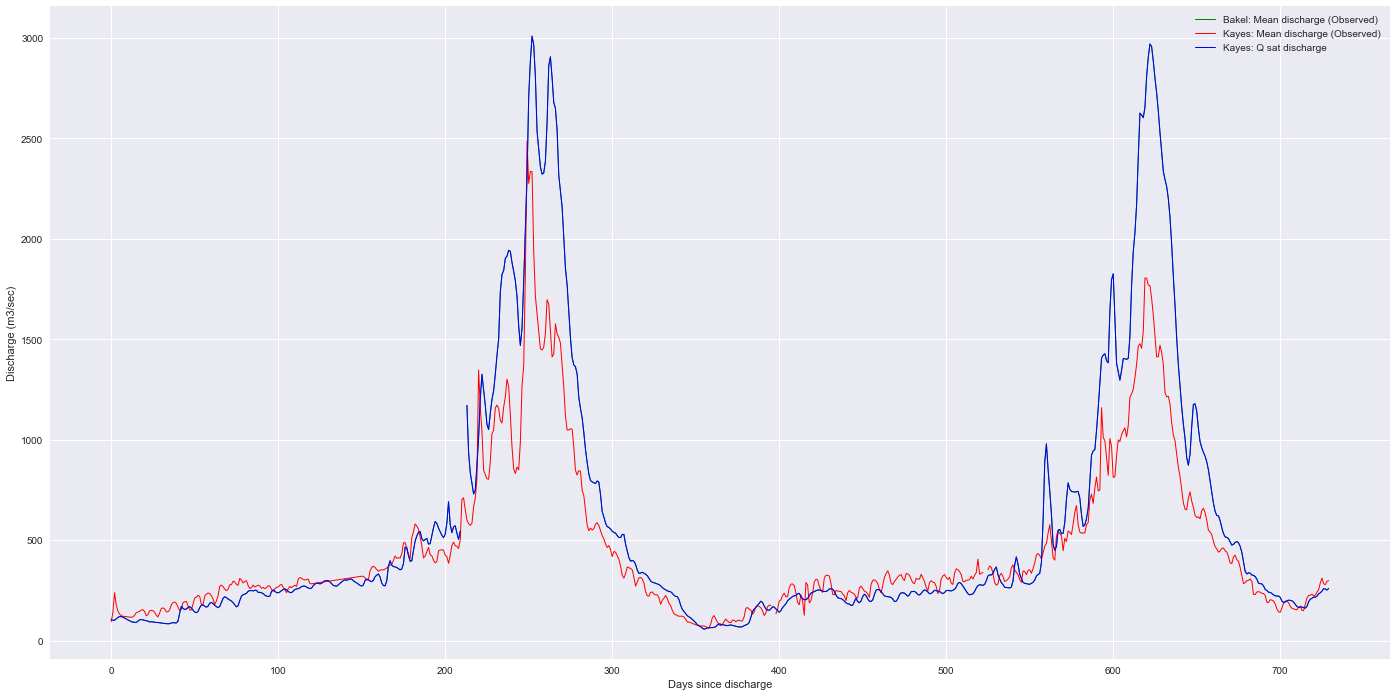

In [23]:
bakel_discharge.index = pd.RangeIndex(len(bakel_discharge.index)) # bakel discharge index to conform to that of kayes
bakel_discharge.index

fig, ax = plt.subplots(figsize=(24, 12))
ax.plot(bakel_discharge['Mean discharge'], linestyle='-', linewidth=1, color='g', label='Bakel: Mean discharge (Observed)')
ax.plot(kayes_discharge['Mean discharge (Observed)'], linestyle='-', color='r', linewidth=1, label='Kayes: Mean discharge (Observed)')
ax.plot(kayes_discharge['Q sat discharge'], linestyle='-', linewidth=1, color='b', label='Kayes: Q sat discharge')
ax.set_xlabel('Days since discharge')
ax.set_ylabel('Discharge (m3/sec)')
ax.legend()

# Save the image in memory in PNG format
png_bakel_kayes_discharge = io.BytesIO()
fig.savefig(png_bakel_kayes_discharge, format="png")
# Load this image into PIL
png_save = Image.open(png_bakel_kayes_discharge)

# Save as TIFF
png_save.save("output/Discharge_bakel_and_kayes.tiff")
png_bakel_kayes_discharge.close()

In [ ]:
# WITH DATE AXIS: DISCHARGE KAYES & BAKEL

In [53]:
# BAKEL
bakel_discharge_new = pd.read_csv('data/Bakel - Blad1 (1).csv', delimiter = ',', parse_dates=True, index_col=0, header = 0, encoding="utf-8" )

bakel_discharge_new = bakel_discharge_new.loc['2008-01-01':'2010-12-31']

# KAYES

kayes_discharge_new = pd.read_csv('data/Kayes - Blad1 (1).csv', delimiter = ',', parse_dates=True, index_col=0, header = 0, encoding="utf-8" )

kayes_discharge_new = kayes_discharge_new.loc['2008-01-01':'2010-12-31']

bakel_discharge_new.info()

print('\n')

kayes_discharge_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1096 entries, 2008-01-01 to 2010-12-31
Data columns (total 1 columns):
Mean discharge    1093 non-null float64
dtypes: float64(1)
memory usage: 17.1 KB


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 730 entries, 2009-01-01 to 2010-12-31
Data columns (total 2 columns):
Mean discharge (Observed)    726 non-null float64
Q sat discharge              727 non-null float64
dtypes: float64(2)
memory usage: 17.1 KB


In [39]:
# bakel_discharge_new.to_csv('data/bakel_blad_2008_2010.csv')
# kayes_discharge_new.to_csv('data/kayes_blad_2008_2010.csv')

In [59]:
bakel_2008_2010 = pd.read_csv('data/bakel_blad_2008_2010.csv', header = 0, parse_dates=True, na_filter=True, encoding="utf-8")

bakel_2008_2010['date'] = pd.to_datetime(bakel_2008_2010['date'])

kayes_2008_2010 = pd.read_csv('data/kayes_blad_2008_2010.csv', header = 0, parse_dates=True, na_filter=True, encoding="utf-8")

kayes_2008_2010['date'] = pd.to_datetime(kayes_2008_2010['date'])


In [60]:
bakel_2008_2010 = bakel_2008_2010.set_index('date')
bakel_2008_2010.index

print('\n')

kayes_2008_2010 = kayes_2008_2010.set_index('date')
kayes_2008_2010.index

DatetimeIndex(['2009-01-01', '2009-01-02', '2009-01-03', '2009-01-04',
               '2009-01-05', '2009-01-06', '2009-01-07', '2009-01-08',
               '2009-01-09', '2009-01-10',
               ...
               '2010-12-22', '2010-12-23', '2010-12-24', '2010-12-25',
               '2010-12-26', '2010-12-27', '2010-12-28', '2010-12-29',
               '2010-12-30', '2010-12-31'],
              dtype='datetime64[ns]', name='date', length=730, freq=None)

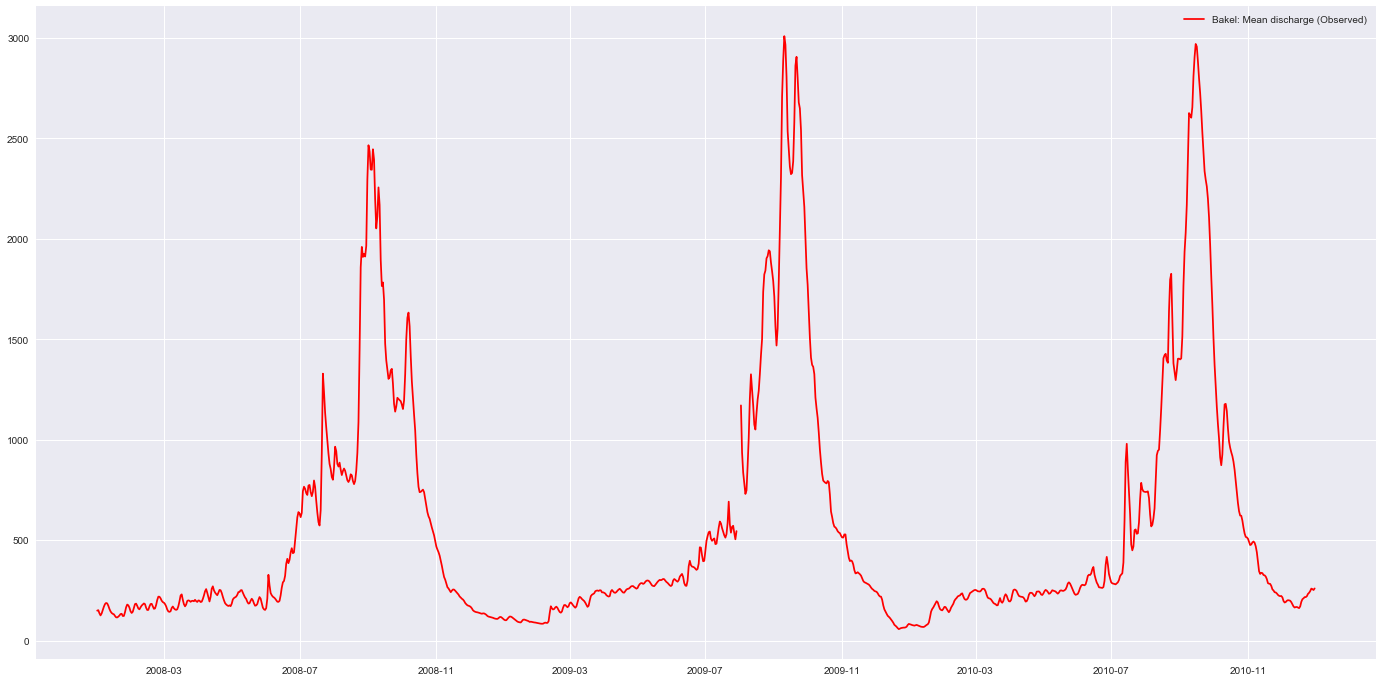

In [61]:
fig, ax = plt.subplots(figsize=(24, 12))
ax.plot(bakel_2008_2010['Mean discharge'], linestyle = 'solid', color='r', label='Bakel: Mean discharge (Observed)')

# ax.set_xticks(ax.get_xticks()[::100])

ax.legend()

# Save the image in memory in PNG format
png_bakel_blad = io.BytesIO()
fig.savefig(png_bakel_blad, format="png")
# Load this image into PIL
png_save = Image.open(png_bakel_blad)

# Save as TIFF
png_save.save("output/Discharge_bakel_with_date.tiff")
png_bakel_blad.close()


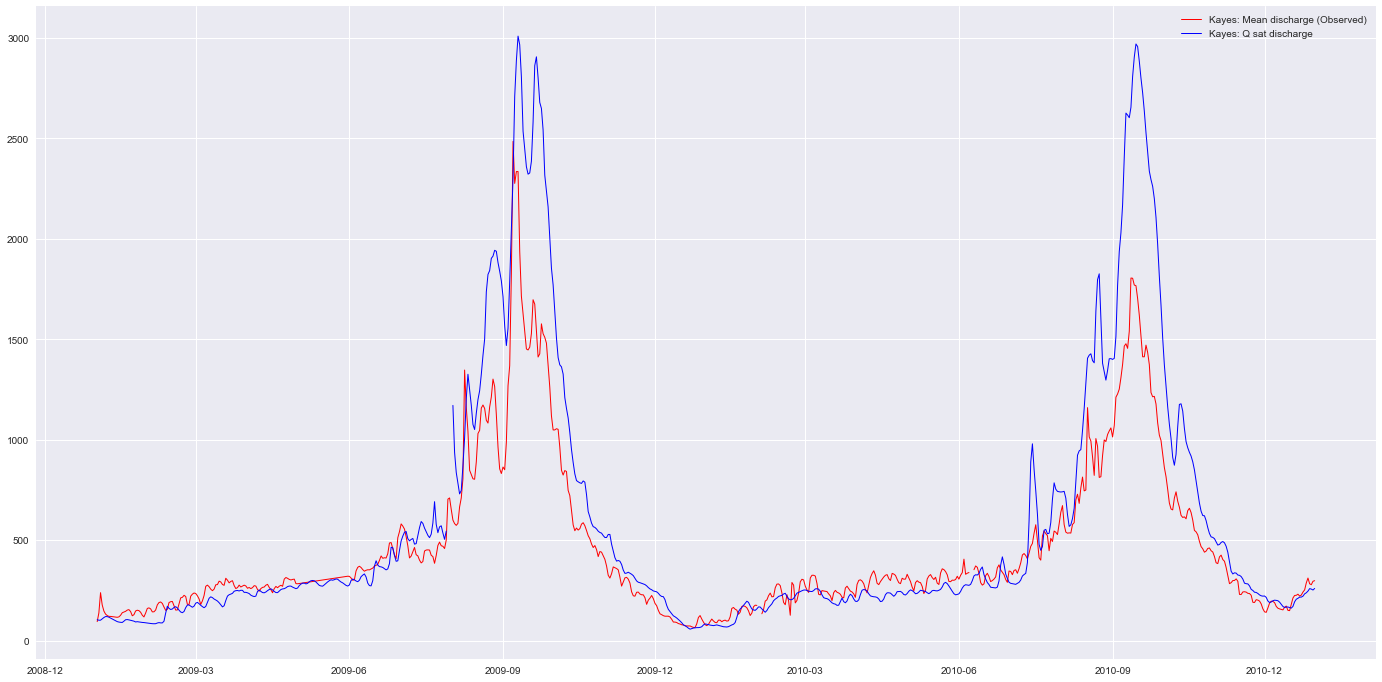

In [62]:
fig, ax = plt.subplots(figsize=(24, 12))
ax.plot(kayes_2008_2010['Mean discharge (Observed)'], linestyle='-', color='r', linewidth=1, label='Kayes: Mean discharge (Observed)')
ax.plot(kayes_2008_2010['Q sat discharge'], linestyle='-', linewidth=1, color='b', label='Kayes: Q sat discharge')

ax.legend()

# Save the image in memory in PNG format
png_kayes_blad = io.BytesIO()
fig.savefig(png_kayes_blad, format="png")
# Load this image into PIL
png_save = Image.open(png_kayes_blad)

# Save as TIFF
png_save.save("output/Discharge_kayes_with_date.tiff")
png_kayes_blad.close()

In [24]:
#====================== MODEL DISCHARGE & MCR

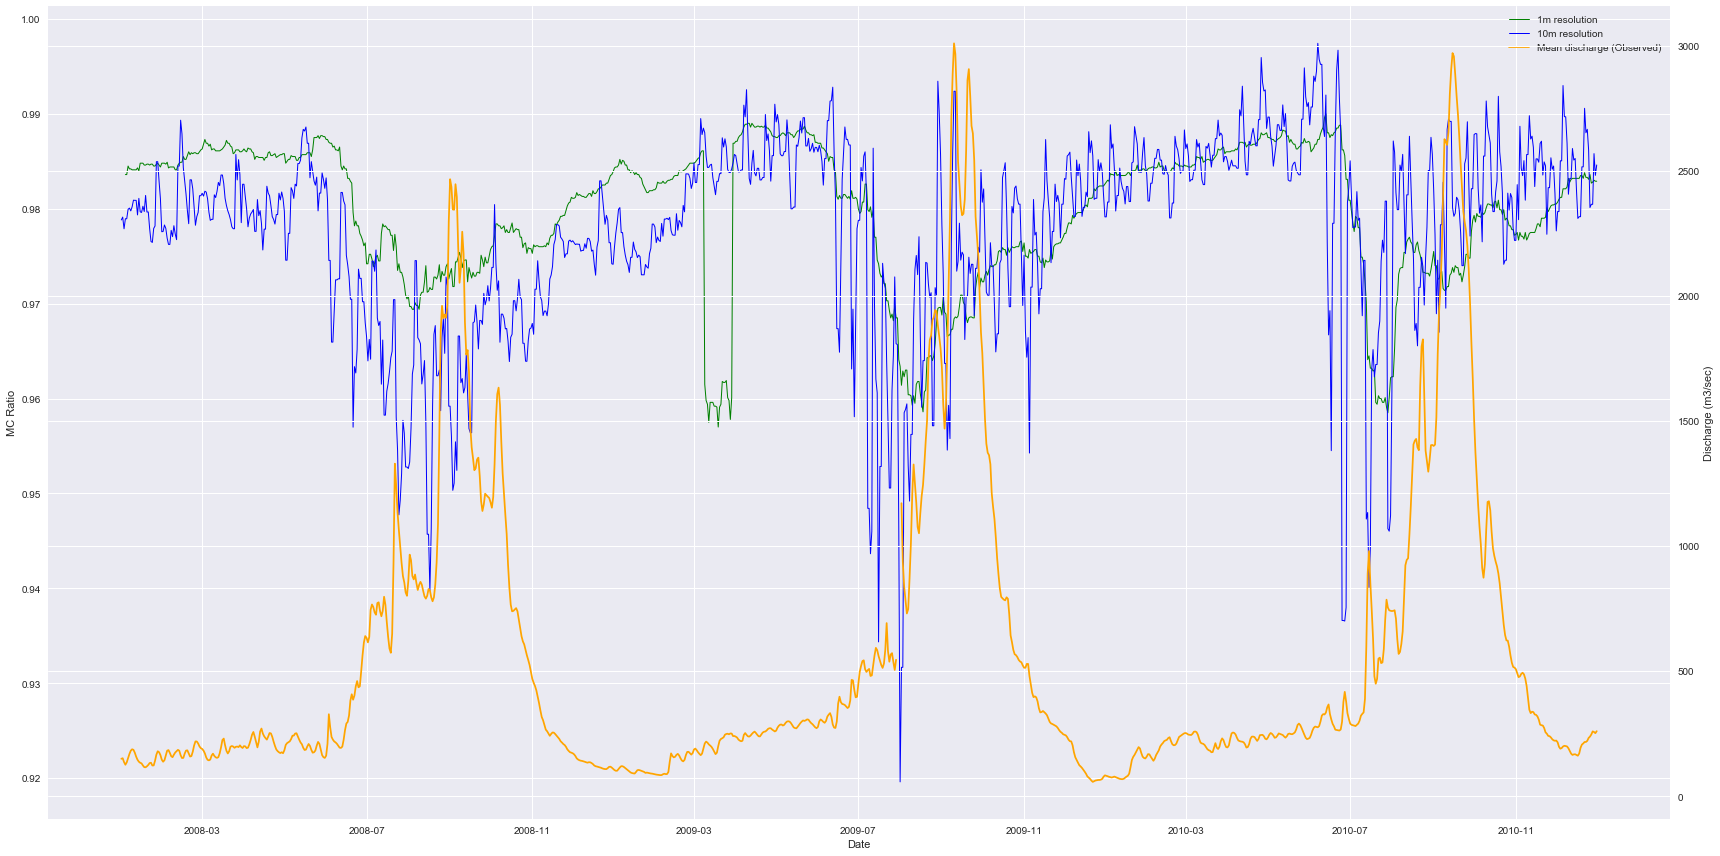

In [30]:
# BAKEL Plot 1x1, 10x10 MCR and Discharge together
fig, ax1 = plt.subplots(figsize=(24, 12))
line1 = ax1.plot(bakel_1['WI-AMSRE-KA-H-DESC-K90_V003_1000_AVG'], color= 'g', linestyle='-', linewidth=1, label='1m resolution')
line2 = ax1.plot(bakel_10['mcr'], linestyle='-', color='b', linewidth=1, label='10m resolution')
ax1.set_xlabel('Date')
ax1.set_ylabel('MC Ratio')
ax1.legend()

ax2 = ax1.twinx()

line3 = ax2.plot(bakel_2008_2010['Mean discharge'], linestyle = 'solid', color='orange', label='Mean discharge (Observed)')
ax2.set_ylabel('Discharge (m3/sec)')

# ax2.set_xticks(ax.get_xticks()[::100])

# legend
lines = line1 + line2 + line3
labs = [l.get_label() for l in lines]

ax1.legend(lines, labs, loc=0)

fig.tight_layout()

# Save the image in memory in PNG format
png_bakel_mcr_discharge = io.BytesIO()
fig.savefig(png_bakel_mcr_discharge, format="png")
# Load this image into PIL
png_save = Image.open(png_bakel_mcr_discharge)

# Save as TIFF
png_save.save("output/Discharge_and_MCR_bakel.tiff")
png_bakel_mcr_discharge.close()

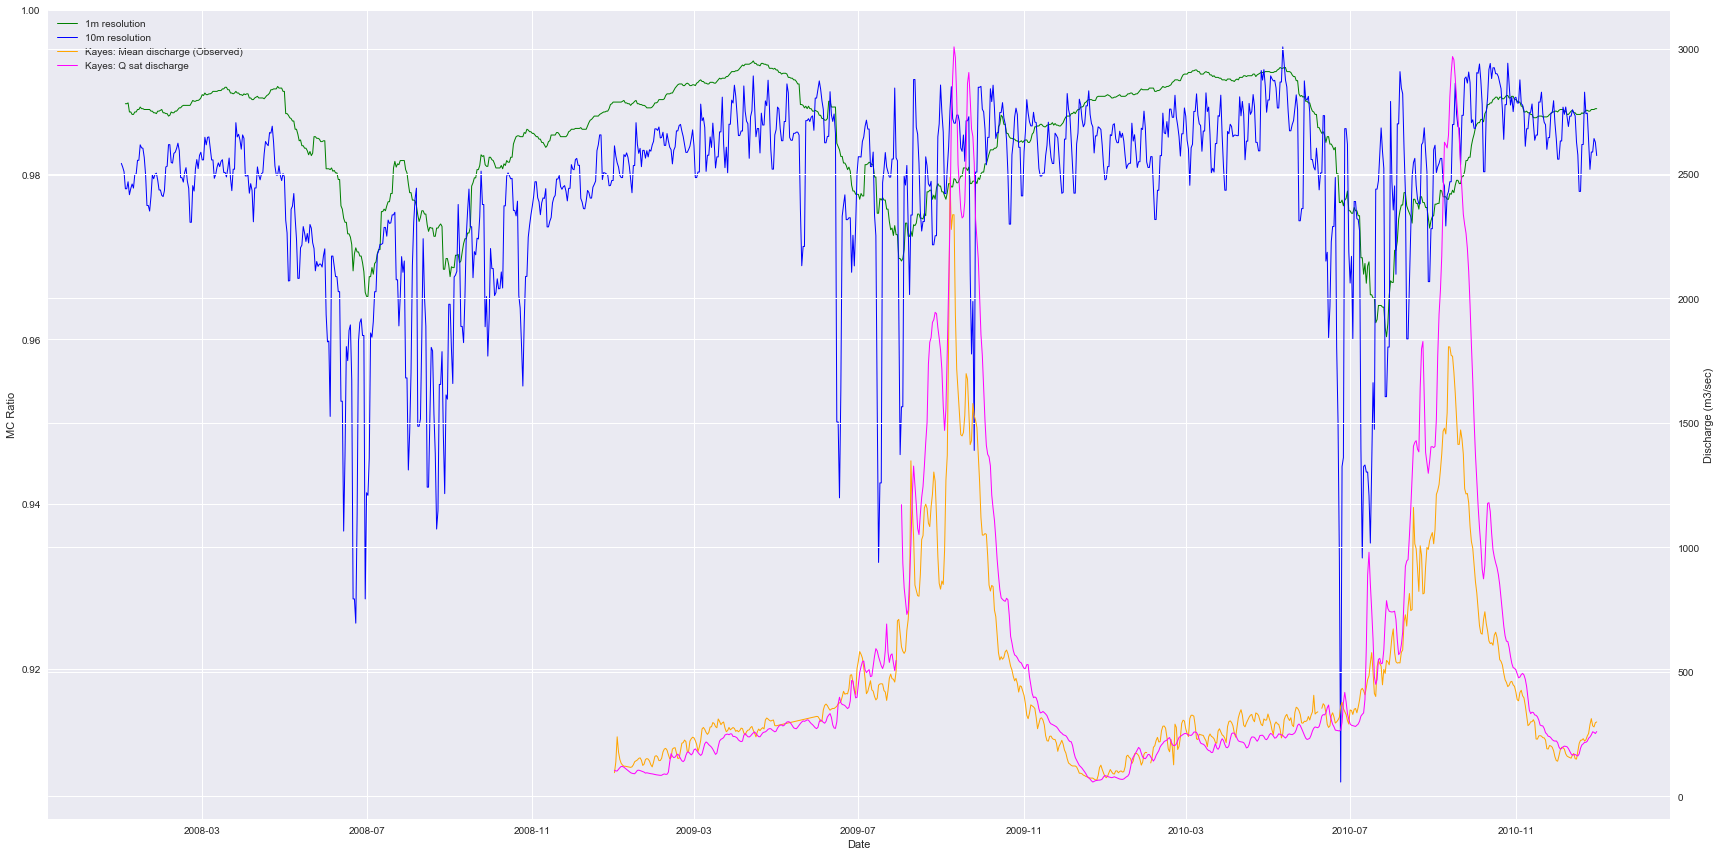

In [67]:
# CONT. ======KAYES Plot 1x1, 10x10 MCR and Discharge together
fig, ax1 = plt.subplots(figsize=(24, 12))
line1 = ax1.plot(kayes_1['WI-AMSRE-KA-H-DESC-K90_V003_1000_AVG'], color= 'g', linestyle='-', linewidth=1, label='1m resolution')
line2 = ax1.plot(kayes_10['mcr'], linestyle='-', color='b', linewidth=1, label='10m resolution')

ax1.set_xlabel('Date')
ax1.set_ylabel('MC Ratio')

ax2 = ax1.twinx()

line3 = ax2.plot(kayes_2008_2010['Mean discharge (Observed)'], linestyle='-', color='orange', linewidth=1, label='Kayes: Mean discharge (Observed)')
line4 = ax2.plot(kayes_2008_2010['Q sat discharge'], linestyle='-', linewidth=1, color='magenta', label='Kayes: Q sat discharge')

ax2.set_ylabel('Discharge (m3/sec)')

# legend
lines = line1 + line2 + line3 + line4
labs = [l.get_label() for l in lines]

ax1.legend(lines, labs, loc=0)

fig.tight_layout()

# Save the image in memory in PNG format
png_kayes_mcr_discharge = io.BytesIO()
fig.savefig(png_kayes_mcr_discharge, format="png")
# Load this image into PIL
png_save = Image.open(png_kayes_mcr_discharge)

# Save as TIFF
png_save.save("output/Discharge_and_MCR_kayes.tiff")
png_kayes_mcr_discharge.close()

In [69]:
#============= 4-DAY MOVING AVERAGE (FORWARD)
# ===========  Reference: https://towardsdatascience.com/moving-averages-in-python-16170e20f6c

In [70]:
bafoulabe_10["moving_av_4_days_forward"] = bafoulabe_10.mcr.rolling(window=4).mean()
kayes_10["moving_av_4_days_forward"] = kayes_10.mcr.rolling(window=4).mean()
bakel_10["moving_av_4_days_forward"] = bakel_10.mcr.rolling(window=4).mean()

In [71]:
print(bafoulabe_10.head(5))

             value       mcr  moving_av_4_days_forward
date                                                  
2008-01-01  989226  0.989226                       NaN
2008-01-02  990394  0.990394                       NaN
2008-01-03  990562  0.990562                       NaN
2008-01-04  987285  0.987285                  0.989367
2008-01-05  987285  0.987285                  0.988881


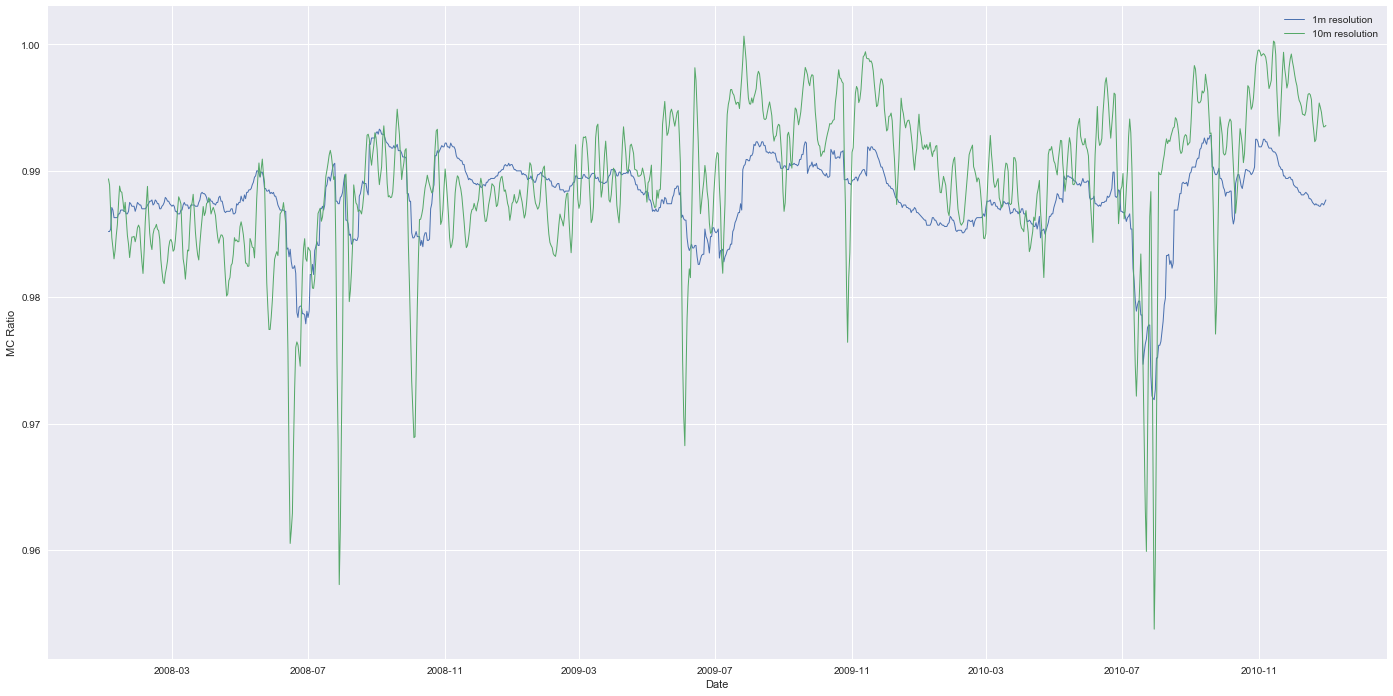

In [35]:
# BAFOULABE Plot 1x1 and 10x10 time series together
fig, ax = plt.subplots(figsize=(24, 12))
ax.plot(bafoulabe_1['WI-AMSRE-KA-H-DESC-K90_V003_1000_AVG'], linestyle='-', linewidth=1, label='1m resolution')
ax.plot(bafoulabe_10['moving_av_4_days_forward'], linestyle='-', linewidth=1, label='10m resolution')
ax.set_xlabel('Date')
ax.set_ylabel('MC Ratio')
# ax.set_title('BAFOULABE')
ax.legend()

# Save the image in memory in PNG format
png_bafoulabe = io.BytesIO()
fig.savefig(png_bafoulabe, format="png")
# Load this image into PIL
png_save = Image.open(png_bafoulabe)

# Save as TIFF
png_save.save("output/4Day_Moving_Avg_Forward_bafoulabe.tiff")
png_bafoulabe.close()

In [68]:
# KAYES Plot 1x1 and 10x10 time series together
fig, ax = plt.subplots(figsize=(24, 12))
ax.plot(kayes_1['WI-AMSRE-KA-H-DESC-K90_V003_1000_AVG'], linestyle='-', linewidth=1, label='1m resolution')
ax.plot(kayes_10['moving_av_4_days_forward'], linestyle='-', linewidth=1, label='10m resolution')
ax.set_xlabel('Date')
ax.set_ylabel('MC Ratio')
ax.legend()

# Save the image in memory in PNG format
png_kayes = io.BytesIO()
fig.savefig(png_kayes, format="png")
# Load this image into PIL
png_save = Image.open(png_kayes)

# Save as TIFF
png_save.save("output/4Day_Moving_Avg_Forward_kayes.tiff")
png_kayes.close()

KeyError: 'moving_av_4_days'

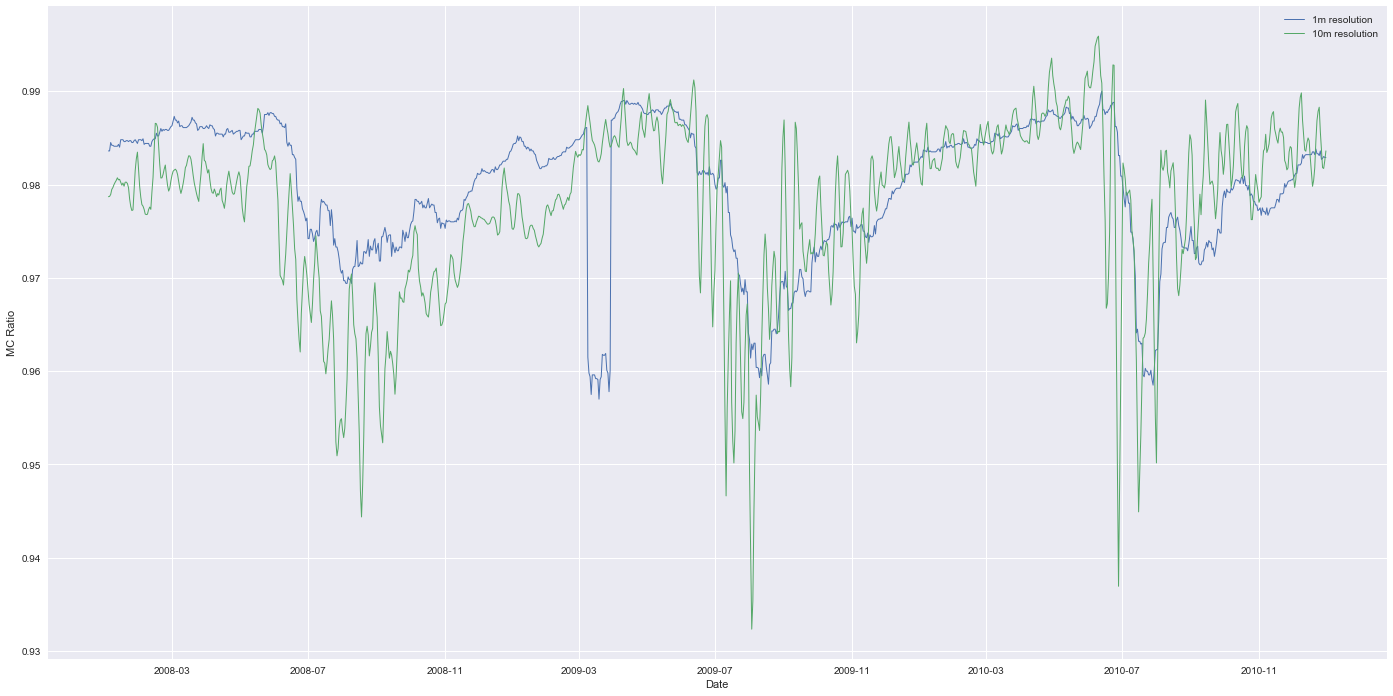

In [111]:
# BAKEL Plot 1x1 and 10x10 time series together
fig, ax = plt.subplots(figsize=(24, 12))
ax.plot(bakel_1['WI-AMSRE-KA-H-DESC-K90_V003_1000_AVG'], linestyle='-', linewidth=1, label='1m resolution')
ax.plot(bakel_10['moving_av_4_days_forward'], linestyle='-', linewidth=1, label='10m resolution')
ax.set_xlabel('Date')
ax.set_ylabel('MC Ratio')
ax.legend()

# Save the image in memory in PNG format
png_bakel = io.BytesIO()
fig.savefig(png_bakel, format="png")
# Load this image into PIL
png_save = Image.open(png_bakel)

# Save as TIFF
png_save.save("output/4Day_Moving_Avg_Forward_bakel.tiff")
png_bakel.close()

In [127]:
#============= 4-DAY MOVING AVERAGE (BACKWARD)

In [152]:
bafoulabe_10["moving_av_4_days_backwards"] = bafoulabe_10.mcr.rolling(window=4).mean().shift(-4)
kayes_10["moving_av_4_days_backwards"] = kayes_10.mcr.rolling(window=4).mean().shift(-4)
bakel_10["moving_av_4_days_backwards"] = bakel_10.mcr.rolling(window=4).mean().shift(-4)
bafoulabe_1["moving_av_4_days_backwards"] = bafoulabe_1['WI-AMSRE-KA-H-DESC-K90_V003_1000_AVG'].rolling(window=4).mean().shift(-4)
kayes_1["moving_av_4_days_backwards"] = kayes_1['WI-AMSRE-KA-H-DESC-K90_V003_1000_AVG'].rolling(window=4).mean().shift(-4)
bakel_1["moving_av_4_days_backwards"] = bakel_1['WI-AMSRE-KA-H-DESC-K90_V003_1000_AVG'].rolling(window=4).mean().shift(-4)

In [154]:
bafoulabe_1.head(10)

,WI-AMSRE-KA-H-DESC-K90_V003_1000,WI-AMSRE-KA-H-DESC-K90_V003_1000_AVG,WI-AMSRE-KA-H-DESC-K90_V003_1000_CLIMATOLOGY,moving_av_4_days_backwards
date,,,,
2008-01-01,0.988881,NaN,0.9884,NaN
2008-01-02,0.986731,NaN,0.9883,NaN
2008-01-03,0.984728,NaN,0.9882,0.985725
2008-01-04,0.983924,0.9852,0.9871,0.986150
2008-01-05,0.983039,0.9852,0.9871,0.986425
2008-01-06,0.983715,0.9854,0.9872,0.986650
2008-01-07,0.984872,0.9871,0.9876,0.986450
2008-01-08,0.985754,0.9869,0.9876,0.986300
2008-01-09,0.987372,0.9863,0.9872,0.986375
